# Exploratory Data Analysis of EU IT salaries 2018-2020

https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region/code


In [424]:
# Load pandas

import pandas as pd 
import seaborn as sns

# Look for filnames in dataset directory

df_files = []

import os
for dirname, _, filenames in os.walk('Datasets/IT Salaries EU 2018-2020'):
    for filename in filenames:
        df_files.append(os.path.join(dirname, filename))


In [425]:
df_files

['Datasets/IT Salaries EU 2018-2020/IT Salary Survey EU  2020.csv',
 'Datasets/IT Salaries EU 2018-2020/T Salary Survey EU 2019.csv',
 'Datasets/IT Salaries EU 2018-2020/IT Salary Survey EU 2018.csv']

In [426]:
# Load csv files

df_2018, df_2019, df_2020 = pd.read_csv(df_files[2]), pd.read_csv(df_files[1]), pd.read_csv(df_files[0])

In [427]:
# check if columns are same
print(df_2018.columns)
print(df_2019.columns)
print(df_2020.columns)

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position', 'Years of experience',
       'Your level', 'Current Salary', 'Salary one year ago',
       'Salary two years ago', 'Are you getting any Stock Options?',
       'Main language at work', 'Company size', 'Company type'],
      dtype='object')
Index(['Zeitstempel', 'Age', 'Gender', 'City', 'Seniority level',
       'Position (without seniority)', 'Years of experience',
       'Your main technology / programming language',
       'Yearly brutto salary (without bonus and stocks)', 'Yearly bonus',
       'Yearly stocks',
       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country',
       'Yearly bonus one year ago. Only answer if staying in same country',
       'Yearly stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Number of home office days per month',
       'Main language at work', 'Company name ', 'Company size',
       'Company typ

In [428]:
# Preparing data for merging
#  1. Renaming columns names:
#  

df_2018.rename(columns={'Your level': 'Seniority level',
                        'Are you getting any Stock Options?':'Stock options 2018'}, inplace=True)

df_2019.rename(columns={'Zeitstempel': 'Timestamp', 
                       'Position (without seniority)': 'Position', 
                       'Yearly brutto salary (without bonus and stocks)': 'Current Salary',
                       'Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country': 'Salary one year ago', 
                       'Yearly bonus one year ago. Only answer if staying in same country': 'Bonus year ago 2019',
                       'Yearly stocks one year ago. Only answer if staying in same country':'Yearly stock one year ago 2019'}, inplace=True)

df_2020.rename(columns={'Total years of experience': 'Years of experience', 
                        'Position ': 'Position', 
                        'Yearly bonus + stocks in EUR': 'Yearly bonus + stocks', 
                        'Yearly brutto salary (without bonus and stocks) in EUR': 'Current Salary', 
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country': 'Salary one year ago',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country': 'Yearly bonus + stocks year ago'}, inplace=True)



In [429]:
# remove seniority from position in 2018
# look for junior, senior,middle position:
# display(df_2018.loc[df_2018.Position.str.contains('junior|middle|senior', case=False, na=False)])

# remove junior, Senior and midle
df_2018['Position'] = df_2018.Position.str.replace('((J|j)unior)|((S|s)enior) ', '')
df_2018['Position'] = df_2018.Position.str.replace(' ((J|j)unior)|((S|s)enior)', '')
# df_2018['Seniority level'].unique()
# df_2018.head(15)

# 2018: Change values M, F to Male and Female
df_2018.loc[df_2018['Gender'] == 'M', 'Gender'] = 'Male'
df_2018.loc[df_2018['Gender'] == 'F', 'Gender'] = 'Female'
# df_2018.head()

# 2019: Get solumn Bonus + stock , to compare with 2020
df_2019['Yearly bonus + stocks'] = df_2019['Yearly bonus'] + df_2019['Yearly stocks']
df_2019['Yearly bonus + stocks year ago'] = df_2019['Bonus year ago 2019'] + df_2019['Yearly stock one year ago 2019']


/var/folders/1j/q8wpqmgs6y51n2g9j981nd300000gn/T/ipykernel_1282/3974664466.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2018['Position'] = df_2018.Position.str.replace('((J|j)unior)|((S|s)enior) ', '')
/var/folders/1j/q8wpqmgs6y51n2g9j981nd300000gn/T/ipykernel_1282/3974664466.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2018['Position'] = df_2018.Position.str.replace(' ((J|j)unior)|((S|s)enior)', '')


In [430]:
# merging using concatb
df = pd.concat([df_2018, df_2019, df_2020])

In [431]:
# Remove unnesessary columns
df.drop(columns=['0', 
                'Years of experience in Germany', 
                'Other technologies/programming languages you use often', 
                'Your main technology / programming language', 
                'Have you lost your job due to the coronavirus outbreak?', 
                'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                'Number of vacation days',
                'Number of home office days per month',
                'Yearly bonus',
                'Yearly stocks',
                'Bonus year ago 2019',
                'Yearly stock one year ago 2019'], inplace=True)


In [432]:
df.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Seniority level,Current Salary,Salary one year ago,Salary two years ago,Stock options 2018,Main language at work,Company size,Company type,Company name,Сontract duration,Company business sector,Yearly bonus + stocks,Yearly bonus + stocks year ago,Employment status
0,14/12/2018 12:41:33,43.0,Male,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product,NaN,NaN,NaN,NaN,NaN,NaN
1,14/12/2018 12:42:09,33.0,Female,München,PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product,NaN,NaN,NaN,NaN,NaN,NaN
2,14/12/2018 12:47:36,32.0,Male,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product,NaN,NaN,NaN,NaN,NaN,NaN
3,14/12/2018 12:50:15,25.0,Male,München,Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product,NaN,NaN,NaN,NaN,NaN,NaN
4,14/12/2018 12:50:31,39.0,Male,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer,NaN,NaN,NaN,NaN,NaN,NaN


In [433]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3009 entries, 0 to 1252
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Timestamp                       3009 non-null   object 
 1   Age                             2780 non-null   float64
 2   Gender                          2985 non-null   object 
 3   City                            2980 non-null   object 
 4   Position                        2974 non-null   object 
 5   Years of experience             2960 non-null   object 
 6   Seniority level                 2960 non-null   object 
 7   Current Salary                  2993 non-null   float64
 8   Salary one year ago             2084 non-null   float64
 9   Salary two years ago            463 non-null    float64
 10  Stock options 2018              742 non-null    object 
 11  Main language at work           2973 non-null   object 
 12  Company size                    29

In [434]:
# Convert timestamp to pddatetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

<AxesSubplot:>

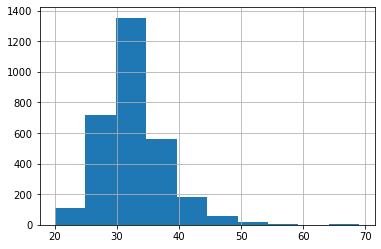

In [435]:
# Feel NaN Age with Age mean

df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'].hist()

In [436]:
# Prepare Gender
print(df['Gender'].value_counts(normalize=True) * 100)
print('NaN:', df['Gender'].isnull().sum())

# We have only 26 values of unknown Gender, we can fill them with proportion of Male / Female, but 26 variable are statistically non significatn, we can feel them just as male
df['Gender'].fillna('Male', inplace=True)
df.loc[df['Gender'] == 'Diverse', 'Gender'] = 'Male'

Male       84.857621
Female     15.075377
Diverse     0.067002
Name: Gender, dtype: float64
NaN: 24


In [437]:
print(df['Gender'].value_counts(normalize=True) * 100)

Male      85.044865
Female    14.955135
Name: Gender, dtype: float64


In [438]:
# pd.set_option('display.max_rows', 30)
# City
display(df['City'].value_counts())
# we see Munich and München , we should sum them up
df.loc[df['City'] == 'München', 'City'] = 'Munich'
df.loc[df['City'] == 'Dublin ', 'City'] = 'Dublin'
# Feel NaN with 'Unknown'
df['City'].fillna('Unknown', inplace=True)

Berlin         1402
Munich          476
München         249
Frankfurt       127
Amsterdam       104
               ... 
Jyvaskyla         1
Odesa             1
Marburg           1
Kassel            1
Saarbrücken       1
Name: City, Length: 183, dtype: int64

In [439]:
df.Position.value_counts()[:40]

# fill NaN with 'Unknown'
df['Position'].fillna('Unknown', inplace=True)

# write positions of DS, for future
# Data Scientist, Data Engineer, Machine Learning Engineer, Business Analyst, Researcher, Data Analyst, 
ds_mask = ['Data Scientist', 'Data Engineer', 'Machine Learning Engineer', 'Business Analyst', 'Researcher', 'Data Analyst']

Software Engineer     439
Backend Developer     432
Data Scientist        245
Frontend Developer    173
DevOps                123
                     ... 
Software developer      6
DevOps Engineer         6
PHP developer           5
Consultant              5
C++ Developer           5
Name: Position, Length: 40, dtype: int64

In [440]:
# Years of experience
print(df['Years of experience'].unique())

# replace strings values
df['Years of experience'].replace({'1 (as QA Engineer) / 11 in total': '11', 
                                    '2,5': '2.5', '1,5': '1.5',
                                    '15, thereof 8 as CTO': '15', 
                                    '6 (not as a data scientist, but as a lab scientist)': '6',
                                    'less than year': '0.8', }, inplace=True)
# replace dot number with integers
df['Years of experience'].fillna(1000, inplace=True) # fill with 1000 to replace 1000 for mean later
df['Years of experience'] = df['Years of experience'].astype(float)
# mean_expirience = df['Years of experience'].loc[df['Years of experience'] != 1000].mean()
# Feel NaNs with mean value
df['Years of experience'].replace({1000: df['Years of experience'].loc[df['Years of experience'] != 1000].mean()}, inplace=True)

[11.0 8.0 10.0 6.0 5.0 3.0 18.0 nan 4.0 17.0 19.0 15.0 12.0 2.0 1.0 9.0
 7.0 20.0 7.5 14.0 13.0 0.5 2.5 1.5 16.0 0.0 25.0 30.0 38.0 21.0 4.5 22 24
 28 '5' '7' '12' '4' '17' '6' '8' '15' '2' '25' '14' '11' '18' '13' '30'
 '10' '3' '40' '26' '23' '9' '19' '20' '5.5' '22' '16' '0.8' '1' '1.5'
 '6.5' '21' '7.5' '2.5' '28' '29' '1,5' '24' '0' '4.5' '27'
 '1 (as QA Engineer) / 11 in total' '2,5' '15, thereof 8 as CTO' '31'
 '6 (not as a data scientist, but as a lab scientist)' '383' '3.5'
 'less than year']


In [441]:
# Look for outliers
# sns.boxplot('Years of experience', data=df)
df[df['Years of experience'] > 30] 
# We've found value 383, but it look like 38 years it total
df['Years of experience'].replace({383: 38}, inplace=True)

,Timestamp,Age,Gender,City,Position,Years of experience,Seniority level,Current Salary,Salary one year ago,Salary two years ago,Stock options 2018,Main language at work,Company size,Company type,Company name,Сontract duration,Company business sector,Yearly bonus + stocks,Yearly bonus + stocks year ago,Employment status
548,2018-12-19 11:17:07,60.0,Female,Munich,PL SQL / C#,38.0,NaN,58000.0,58000.0,58000.0,No,Deutsch,up to 10,Product,NaN,NaN,NaN,NaN,NaN,NaN
59,2020-11-24 11:33:51,66.0,Male,Munich,Software Engineer,40.0,Lead,70000.0,50000.0,NaN,NaN,German,51-100,Product,NaN,Unlimited contract,NaN,NaN,NaN,Full-time employee
955,2020-11-30 12:56:08,54.0,Male,Milano,Sales,31.0,Head,110000.0,110000.0,NaN,NaN,English,11-50,Consulting / Agency,NaN,Unlimited contract,NaN,100000,100000,Full-time employee
1103,2020-06-12 21:51:21,69.0,Male,Stuttgart,Rentner,383.0,Head,70000.0,NaN,NaN,NaN,German,11-50,Consulting / Agency,NaN,NaN,NaN,NaN,NaN,NaN


In [442]:
# Seniority level
# df['Seniority level'].unique()
# df['Seniority level'].value_counts()
df['Seniority level'].replace({'Principal': 'Head', 'Director':'Lead'}, inplace=True)
df['Seniority level'].fillna('Unknown', inplace=True)

# rename values with count 1 to Unknown
mask = df['Seniority level'].value_counts()
df.loc[df['Seniority level'].isin(mask.index[mask == 1]), 'Seniority level' ] = 'Unknown'

In [443]:
# Current Salary

# Remove outliers
df[df['Current Salary'] > 200000]
df.drop(index=[473, 853, 576], inplace=True)
df.at[778, 'Current Salary'] = 85000

# drop rows with Null salary
df = df[df['Current Salary'].notnull()]


,Timestamp,Age,Gender,City,Position,Years of experience,Seniority level,Current Salary,Salary one year ago,Salary two years ago,Stock options 2018,Main language at work,Company size,Company type,Company name,Сontract duration,Company business sector,Yearly bonus + stocks,Yearly bonus + stocks year ago,Employment status
116,2019-02-12 14:29:11,31.000000,Male,Berlin,"CTO (CEO, CFO)",12.000000,Head,2.100000e+05,NaN,NaN,NaN,English,1000+,Product,NaN,unlimited,Сommerce,NaN,NaN,NaN
499,2019-04-12 22:11:43,32.401079,Male,Zug,Backend Developer,12.000000,Senior,2.160000e+05,NaN,NaN,NaN,Deutsch,100-1000,Product,NaN,NaN,Finance / Insurance,NaN,NaN,NaN
948,2019-12-24 21:03:43,24.000000,Male,Munich,Platform Engineer,10.000000,Senior,2.100000e+05,NaN,NaN,NaN,English,1000+,Product,NaN,3 months,Сommerce,NaN,NaN,NaN
473,2020-11-25 03:27:34,32.401079,Male,Berlin,Unknown,8.755034,Unknown,1.000000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,2020-11-25 13:26:21,24.000000,Male,Munich,Data Scientist,1.000000,Junior,3.000000e+05,NaN,NaN,NaN,English,101-1000,Startup,NaN,NaN,NaN,NaN,NaN,Full-time employee
630,2020-11-25 15:53:21,40.000000,Male,Cupertino,Software Engineer,20.000000,Lead,2.500000e+05,230000.0,NaN,NaN,English,1000+,Product,NaN,Unlimited contract,NaN,450000,300000,Full-time employee
778,2020-11-26 17:08:47,42.000000,Male,Berlin,Frontend Developer,18.000000,Senior,8.500000e+05,75000.0,NaN,NaN,English,101-1000,Product,NaN,Unlimited contract,NaN,95000,82000,Full-time employee
804,2020-11-26 22:41:33,20.000000,Male,Berlin,Mobile Developer,5.000000,Lead,2.400000e+05,NaN,NaN,NaN,English,1000+,Product,NaN,Unlimited contract,NaN,15000+-,NaN,Full-time employee
853,2020-11-27 14:55:13,29.000000,Female,Cologne,ML Engineer,1.000000,Middle,5.000000e+08,500000000.0,NaN,NaN,English,up to 10,Startup,NaN,Unlimited contract,NaN,5000000000,50000000,Full-time employee


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985 entries, 0 to 1252
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Timestamp                       2985 non-null   datetime64[ns]
 1   Age                             2985 non-null   float64       
 2   Gender                          2985 non-null   object        
 3   City                            2985 non-null   object        
 4   Position                        2985 non-null   object        
 5   Years of experience             2985 non-null   float64       
 6   Seniority level                 2985 non-null   object        
 7   Current Salary                  2985 non-null   float64       
 8   Salary one year ago             2079 non-null   float64       
 9   Salary two years ago            462 non-null    float64       
 10  Stock options 2018              738 non-null    object        
 11  Main

In [445]:
# Main language at work
df['Main language at work'].replace({'German':'Deutsch', 'Русский':'Russian'}, inplace=True)

# Fill others with English, because most of them are double languages with English
df.loc[df['Main language at work'].isin(mask.index[mask <= 2]), 'Main language at work'] = 'English'

# Fill NaN with German, because most of the Cities located in Germany
df['Main language at work'].fillna('German', inplace=True)

In [446]:
# Company size
print(df['Company size'].value_counts())
df['Company size'].replace({'101-1000': '100-1000',
                             '51-100': '50-100',
                             '11-50': '10-50'}, inplace=True)
# Fill NaN with 1000+ companies, just to put in average category
df['Company size'].fillna('1000+', inplace=True)

1000+       1009
100-1000     625
101-1000     404
50-100       250
10-50        222
11-50        174
51-100       147
up to 10     121
Name: Company size, dtype: int64


In [447]:
# Company type
print(df['Company type'].value_counts()[:30])
df['Company type'].replace({'Consulting': 'Consulting / Agency', 'Agency': 'Consulting / Agency'}, inplace=True)

# Rename all values counts < 8 to 'Others'
mask = df['Company type'].value_counts()
df.loc[df['Company type'].isin(mask.index[mask < 8]), 'Company type'] = 'Others'
# Fill NaNs with 'Others'
df['Company type'].fillna('Others', inplace=True)

Product                 1826
Startup                  575
Consulting / Agency      257
Agency                    73
Bodyshop / Outsource      30
Bank                      11
University                 8
Outsource                  6
Consulting                 5
Corporation                4
Insurance                  3
E-commerce                 3
Automotive                 3
Media                      3
Outsourcing                3
Ecommerce                  2
Consultancy                2
Retail                     2
Utilities                  2
Fintech                    2
Finance                    2
Outsorce                   2
Bank                       2
Industry                   2
e-commerce                 2
E-Commerce                 2
Research                   2
Corporation                1
Old industry               1
Energy                     1
Name: Company type, dtype: int64


In [448]:
# Here we stoped with Data cleaning, we will work with columns we have cleaned
for i in df.columns:
    if df[i].isnull().sum().sum() != 0:
        df.drop(columns=i, inplace=True)



## Feature creation

### 1. Age range: [Young, Middle Age, Old]
Young = 0,
Middle age = 1,
Old = 2
Following the [standard guidelines](https://www.researchgate.net/publication/11543683_A_Comparison_of_Young_Middle-Aged_and_Older_Adult_Treatment-Seeking_Pathological_Gamblers#:~:text=Following%20the%20standard%20guidelines%20%5B17,range%2060%20to%2079%20years.), a young person is in the age range 18 to 39, middle-aged in 40 to 59, and an older adult is in the age range 60 to 79 years.

<AxesSubplot:xlabel='Age', ylabel='Count'>

0.0    2722
1.0     259
2.0       4
Name: Age range, dtype: int64
1.0    2049
2.0     563
3.0     263
0.0     110
Name: Age range, dtype: int64


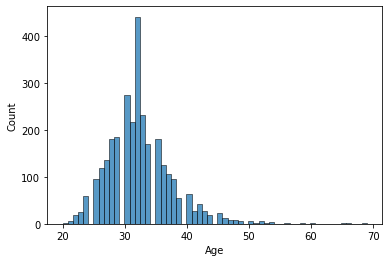

In [511]:
sns.histplot(df['Age'])
df.loc[df['Age'] <= 39, 'Age range'] = 0
df.loc[((df['Age'] >= 40) & (df['Age'] <= 59)), 'Age range'] = 1
df.loc[(df['Age'] >= 60), 'Age range'] = 2

print(df['Age range'].value_counts())
# We have to dived young group, and remove old one, because it isn't statistically signnificat to show
df.loc[df['Age'] < 25, 'Age range'] = 0 # Youth
df.loc[((df['Age'] >= 25) & (df['Age'] < 35)), 'Age range'] = 1 # Young
df.loc[((df['Age'] >= 35) & (df['Age'] < 45)), 'Age range'] = 2 # Middle
df.loc[(df['Age'] >= 40), 'Age range'] = 3  # Old
print(df['Age range'].value_counts())

## TO BE CONTINUED



### 2. Expirence: Unexpirenced, Expirenced
#### Create column "Exp"  
0-2: No expirence = 0  
2-5: little expirience = 1   
5-12: Expirience = 2  
12-20: Well exprienced  = 3    
20+: Guru = 4  

<AxesSubplot:>

2.0    1511
1.0     670
3.0     510
0.0     245
4.0      49
Name: Exp, dtype: int64


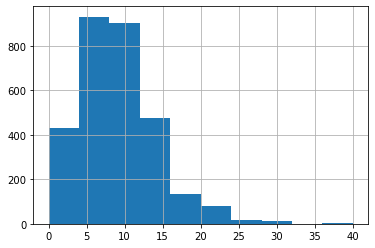

In [521]:
# Plot a histogram to check data distribution
df['Years of experience'].hist()
# Creat a feature column
df.loc[df['Years of experience'] <= 2, 'Exp'] = 0
df.loc[((df['Years of experience'] > 2) & (df['Years of experience'] <= 5)), 'Exp'] = 1
df.loc[((df['Years of experience'] > 5) & (df['Years of experience'] <= 12)), 'Exp'] = 2
df.loc[((df['Years of experience'] > 12) & (df['Years of experience'] <= 20)), 'Exp'] = 3
df.loc[df['Years of experience'] > 20, 'Exp'] = 4

print(df['Exp'].value_counts())



### 3. Salary range: Small, Medium, Large, Extra large

<AxesSubplot:>

1.0    1856
2.0     623
0.0     333
3.0     173
Name: Salary Range, dtype: int64

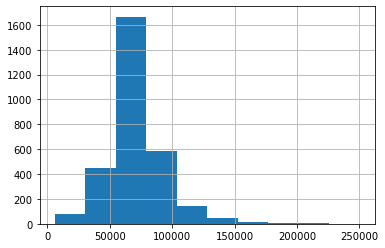

In [526]:
# Look for salary distribution
df['Current Salary'].hist()

df.loc[df['Current Salary'] < 50000, 'Salary Range'] = 0
df.loc[(df['Current Salary'] >= 50000) & (df['Current Salary'] < 80000), 'Salary Range'] = 1
df.loc[(df['Current Salary'] >= 80000) & (df['Current Salary'] < 110000), 'Salary Range'] = 2
df.loc[df['Current Salary'] >= 110000, 'Salary Range'] = 3

df['Salary Range'].value_counts()

In [527]:
# Creat DS and Non DS dataframes
ds_df = df[df['Position'].isin(ds_mask)]
nonds_df = df[~df['Position'].isin(ds_mask)]

In [528]:
# Gender vs Company size in %, rounder to .1
round(pd.crosstab(df['Company size'], df['Gender'], margins=True, normalize=True) * 100, 1)

Gender,Female,Male,All
Company size,,,
10-50,2.4,10.9,13.3
100-1000,5.1,29.4,34.5
1000+,5.3,29.6,34.9
50-100,1.9,11.4,13.3
up to 10,0.4,3.7,4.1
All,15.0,85.0,100.0
